Classify flowers using a model with one hidden layer,but we parametrically change the number of units from 1 to 128.Then we plot the classification accuracy as a function of the model size

In [1]:
#Import libraries
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset
import seaborn as sns
iris=sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


C:\Users\Pratik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pratik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pratik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pratik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

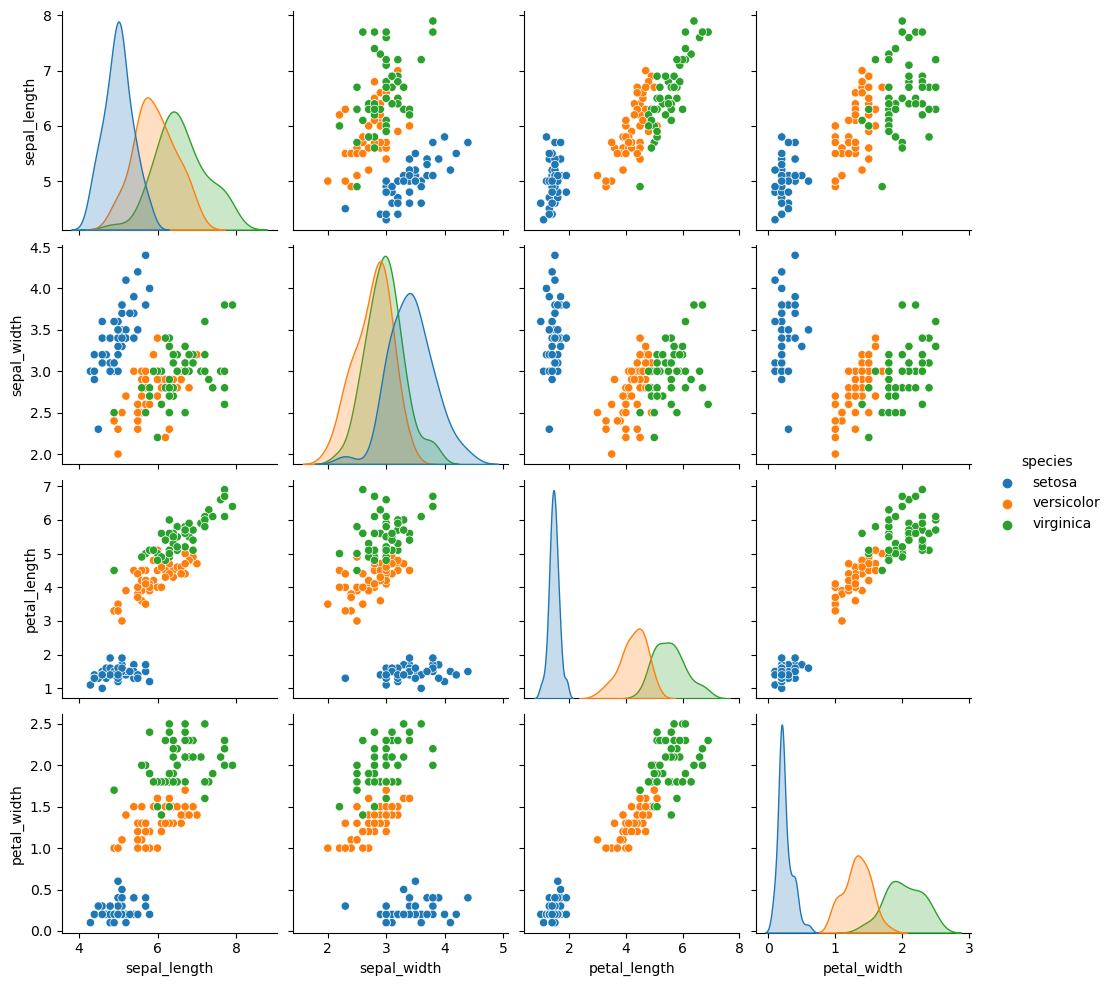

In [3]:
sns.pairplot(iris,hue='species')

In [5]:
#organizing the data
data=torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels=torch.zeros(len(data),dtype=torch.long)

labels[iris.species=='versicolor']==1
labels[iris.species=='virginica']=2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [14]:
def createIrisModel(nHidden):
    # number of hidden layers is softcoded
    ANNiris=nn.Sequential(
        nn.Linear(4,nHidden),
        nn.ReLU(),
        nn.Linear(nHidden,nHidden),
        nn.ReLU(),
        nn.Linear(nHidden,3),
        #nn.Softmax(dim=1),
    )
    #loss function
    lossfun=nn.CrossEntropyLoss()
    #optimizer
    optimizer=torch.optim.SGD(ANNiris.parameters(),lr=.01)
    return ANNiris,lossfun,optimizer

In [15]:
def trainTheModel(ANNiris):
    losses=torch.zeros(numepochs)
    ongoingAcc=[]
    for epochi in range(numepochs):
        yHat=ANNiris(data)
        #shape (150,3)
        #compute loss
        loss=lossfun(yHat,labels)
        losses[epochi]=loss
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #final frward pass
    predictions=ANNiris(data)
    predlabels=torch.argmax(predictions,axis=1)
    return 100*torch.mean((predlabels==labels).float())

        

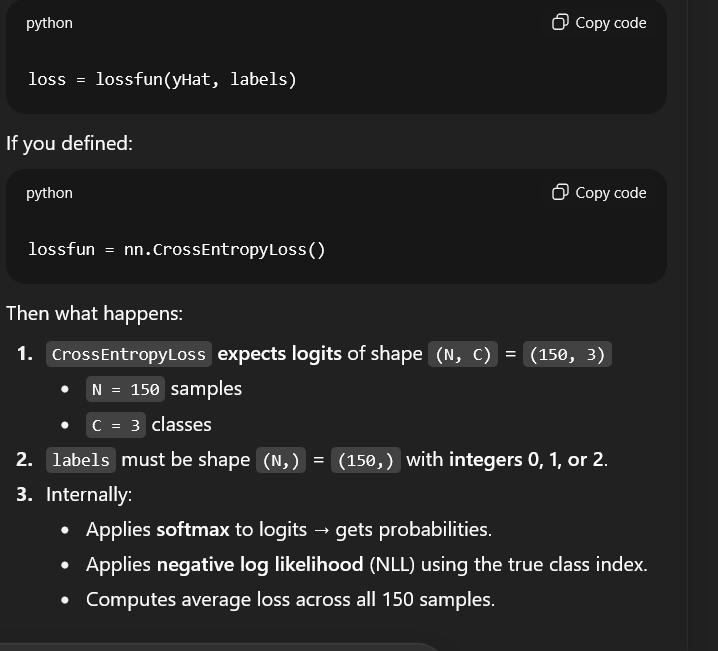


In [16]:
numepochs  = 150
numhiddens = np.arange(1,129)
accuracies = []

for nunits in numhiddens:

  # create a fresh model instance
  ANNiris,lossfun,optimizer = createIrisModel(nunits)

  # run the model
  acc = trainTheModel(ANNiris)
  accuracies.append( acc )

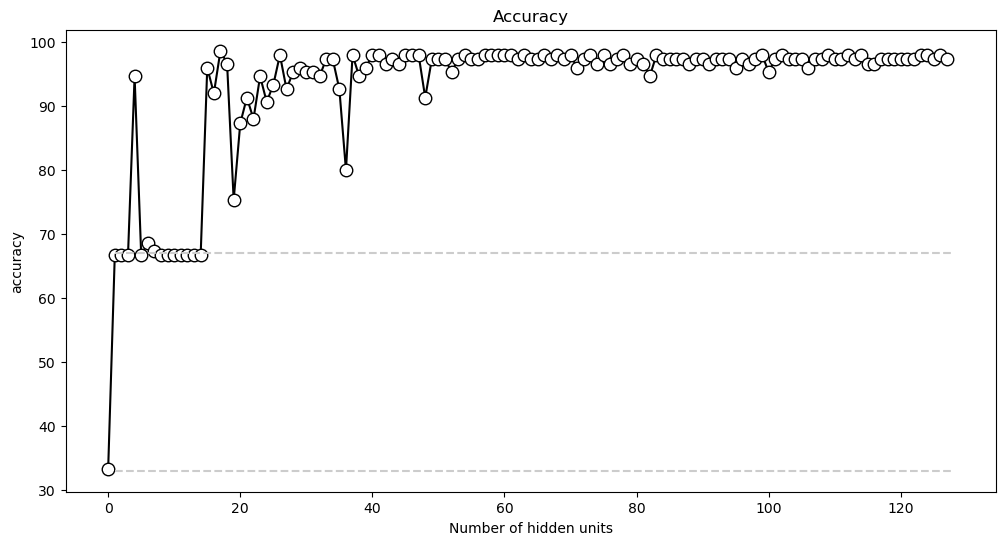

In [17]:


# report accuracy
fig,ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(numhiddens[[0,-1]],[33,33],'--',color=[.8,.8,.8])
ax.plot(numhiddens[[0,-1]],[67,67],'--',color=[.8,.8,.8])
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

     
